In [37]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [38]:
df = pd.read_csv('df_clean.csv')
mega_feux = df[df['FIRE_SIZE']>24790]


C:\Users\pierr\AppData\Local\Temp\ipykernel_16492\2482324411.py:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



# Study the geographical repartition of megafires

In [39]:
import geopandas as gpd

In [40]:
#Allows you to create geometric coordinate points based on longitude and latitude
df_geo = gpd.GeoDataFrame(mega_feux, geometry = gpd.points_from_xy(
mega_feux.LONGITUDE, mega_feux.LATITUDE) )


In [41]:
#We seek to group by state the total size that burned between 1992 and 2015

size_state = mega_feux.groupby(by = mega_feux['STATE'], as_index = False).agg({'FIRE_SIZE':'sum'})
size_state = size_state.sort_values(by = 'FIRE_SIZE', ascending = False)

#We show the distribution of megafires by year with an interactive map
mega_feux2015 = mega_feux[mega_feux['FIRE_YEAR']==2015]

# Create Plotly figure
fig = px.scatter_geo(mega_feux, lat='LATITUDE', lon='LONGITUDE',
                     hover_name='STATE', color='FIRE_YEAR', opacity = 0.6, title = 'Répartition géographique des mégafeux par année')

fig.show()

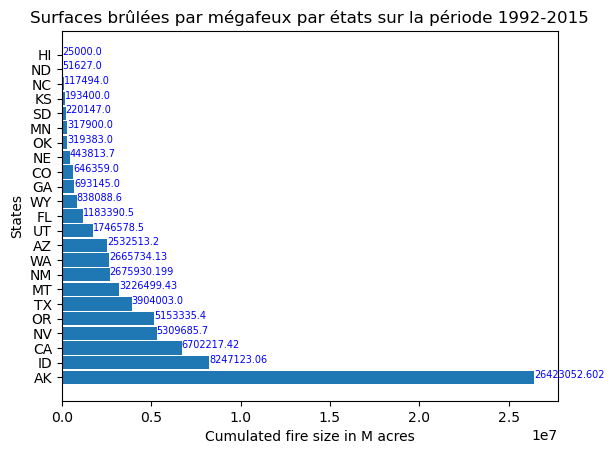

In [42]:
plt.barh(y= size_state['STATE'], width = size_state['FIRE_SIZE'], height = 0.9)

# Add tooltips
for i, v in enumerate(size_state['FIRE_SIZE']):
    plt.text(v + 0.5, i, str(v), color='blue', fontweight='regular', fontsize=7)

plt.xlabel('Cumulated fire size in M acres')
plt.ylabel('States')
plt.title('Surfaces brûlées par mégafeux par états sur la période 1992-2015');

# Study on the temporality of megafires

On an annual basis, at national level, we can see an overall increase in megafires between 1992 and 2015, although some years are exceptions (e.g. 2010).

We can look at the seasonality of megafires to see whether one season is more conducive to megafires than another, for example.

In [43]:
#Let's take a look at the breakdown of mega_feuxes by month of the year

t = mega_feux.groupby(by = mega_feux['START_MONTH'], as_index = False).agg({'MEGA_FEUX':'sum'})
t['START_MONTH'] = t['START_MONTH'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Janvier', 'Février', 'Mars', 'Avril', 'Mai',
                                                            'Juin', 'Juillet', 'Août', 'Septembre',
                                                            'Octobre', 'Novembre', 'Décembre'])
bar_month = px.bar(t, 'START_MONTH','MEGA_FEUX', title='Répartition par mois pour les mégafeux')
bar_month.show()

# Study on the causes of megafires

Let's look at the main causes of megafires between 1992 and 2015

In [44]:
p = mega_feux.groupby(by = mega_feux['STAT_CAUSE_DESCR'], as_index = False).agg({'MEGA_FEUX':'sum'})
p

,STAT_CAUSE_DESCR,MEGA_FEUX
0,Arson,38
1,Campfire,21
2,Children,3
3,Debris Burning,9
4,Equipment Use,28
5,Fireworks,1
6,Lightning,729
7,Miscellaneous,88
8,Missing/Undefined,41
9,Powerline,11


The leading cause of megafires, far ahead of all others, is a natural one: lightning.

<Figure size 2000x1500 with 0 Axes>

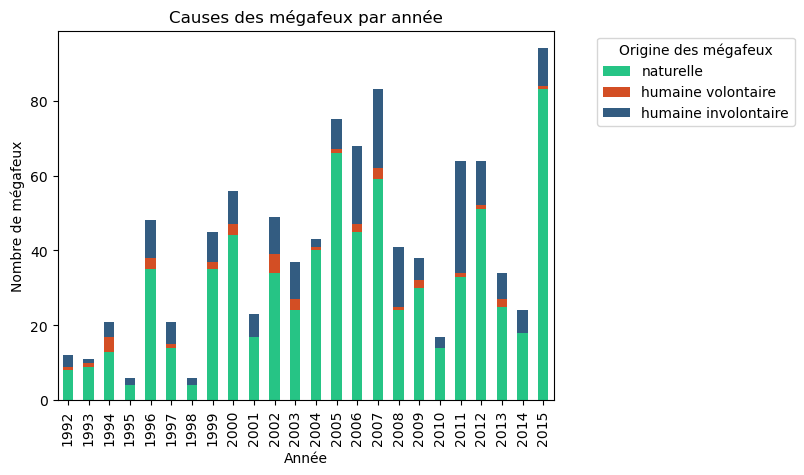

In [45]:
# Grouping of data by year and fire size
grouped_data = mega_feux.groupby(['FIRE_YEAR', 'CAUSE_CATEG']).size().unstack(fill_value=0)
plt.figure(figsize=(20,15))

# Creating a stacked histogram
grouped_data.plot(kind='bar', color = ['#26C485','#D34E24','#335C81'], stacked=True)

# Axis and title configuration
plt.xlabel('Année')
plt.ylabel('Nombre de mégafeux')
plt.title('Causes des mégafeux par année')
plt.legend(labels = ['naturelle', 'humaine volontaire', 'humaine involontaire'], title = 'Origine des mégafeux',
           bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()